<a href="https://colab.research.google.com/github/VarshithaKrishna/xyz/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [ ]:
df=pd.read_csv('/content/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df.head(n=10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
np.unique(df['variety'])

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<ipython-input-25-0c385a6edaa6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl=df.corr()


<Axes: >

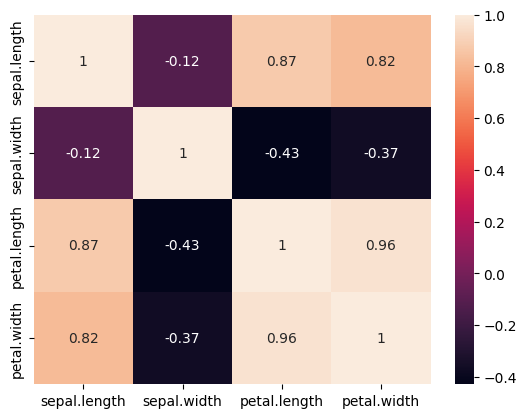

In [ ]:
correl=df.corr()
sns.heatmap(correl,annot=True)

Text(0.5, 1.0, 'Scatter Plot')

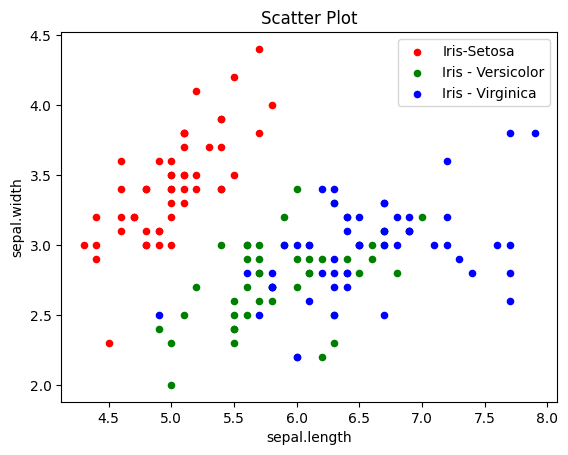

In [ ]:
ax=df[df.variety=='Setosa'].plot.scatter(x='sepal.length',y='sepal.width',color='red',label='Iris-Setosa')
df[df.variety=='Versicolor'].plot.scatter(x='sepal.length',y='sepal.width',color='green',label='Iris - Versicolor',ax=ax)
df[df.variety=='Virginica'].plot.scatter(x='sepal.length',y='sepal.width',color='blue',label='Iris - Virginica',ax=ax)
ax.set_title("Scatter Plot")


In [ ]:
df.isnull().sum()


sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
encoder=LabelEncoder()
df['variety']=encoder.fit_transform(df['variety'])

In [ ]:
np.unique(df['variety'])

array([0, 1, 2])

In [ ]:
data=df.values
x=data[:,0:5]
y=data[:,-1]
print(x.shape)
print(y.shape)
train_x=x[:112,]
train_y=y[:112,]
test_x=x[112:150,]
test_y=y[112:150,]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(150, 5)
(150,)
(112, 5)
(112,)
(38, 5)
(38,)


In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(train_x,train_y)
train_labels=kmeans.predict(train_x)
test_labels=kmeans.predict(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(accuracy_score(train_y,train_labels)*100)
print(accuracy_score(test_labels,test_y)*100)


99.10714285714286
94.73684210526315


In [ ]:
print(classification_report(train_y,train_labels))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       0.98      1.00      0.99        50
         2.0       1.00      0.92      0.96        12

    accuracy                           0.99       112
   macro avg       0.99      0.97      0.98       112
weighted avg       0.99      0.99      0.99       112

